# **Lab-1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats
import hvplot.pandas

In [ ]:
df = pd.read_csv("/content/smoke_detection_iot.csv")

# Display the first few rows of the dataset
df.head().T

,0,1,2,3,4
Unnamed: 0,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
UTC,1.654733e+09,1.654733e+09,1.654733e+09,1.654733e+09,1.654733e+09
Temperature[C],2.000000e+01,2.001500e+01,2.002900e+01,2.004400e+01,2.005900e+01
Humidity[%],5.736000e+01,5.667000e+01,5.596000e+01,5.528000e+01,5.469000e+01
TVOC[ppb],0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
eCO2[ppm],4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
Raw H2,1.230600e+04,1.234500e+04,1.237400e+04,1.239000e+04,1.240300e+04
Raw Ethanol,1.852000e+04,1.865100e+04,1.876400e+04,1.884900e+04,1.892100e+04
Pressure[hPa],9.397350e+02,9.397440e+02,9.397380e+02,9.397360e+02,9.397440e+02
PM1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  FireAlarm       62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [ ]:
df.shape

(62630, 16)

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'FireAlarm'],
      dtype='object')


In [ ]:
df = df.drop(['Unnamed: 0', 'UTC'], axis=1)

print(df.columns)

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'FireAlarm'],
      dtype='object')


In [ ]:
df.shape

(62630, 14)

In [ ]:
print(df.columns)

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'FireAlarm'],
      dtype='object')


In [ ]:
df.FireAlarm.value_counts()

1    44757
0    17873
Name: FireAlarm, dtype: int64

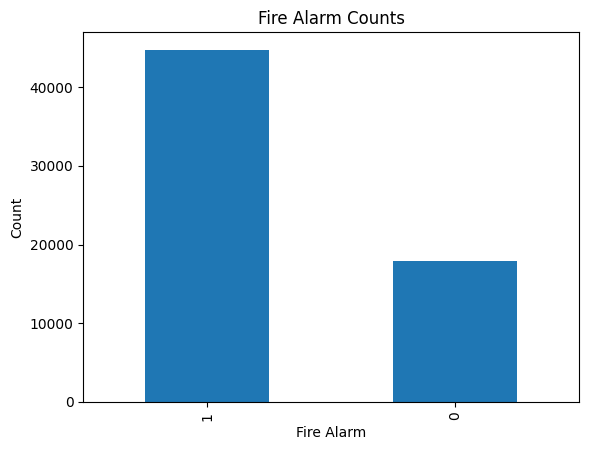

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the bar plot
value_counts = df['FireAlarm'].value_counts()
bar_plot = value_counts.plot(kind='bar', title="Fire Alarm Counts")
bar_plot.set_xlabel('Fire Alarm')
bar_plot.set_ylabel('Count')

plt.savefig('fire_alarm_counts1.png')
# Display the bar plot
plt.show()


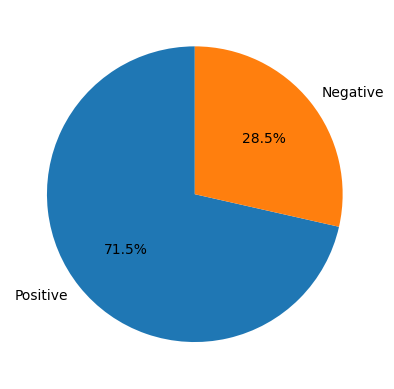

In [ ]:
df['FireAlarm'].value_counts()
plt.pie(df['FireAlarm'].value_counts(), labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle = 90)
plt.savefig('fire_alarm_counts2.png')
plt.show()

In [ ]:
# Check class distribution
print("Count Distribution:")
print(df['FireAlarm'].value_counts())

Count Distribution:
1    44757
0    17873
Name: FireAlarm, dtype: int64


In [ ]:
# Check for missing values
print("Missing Values:")
df.isnull().sum()

Missing Values:


Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
FireAlarm         0
dtype: int64

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val

['FireAlarm']

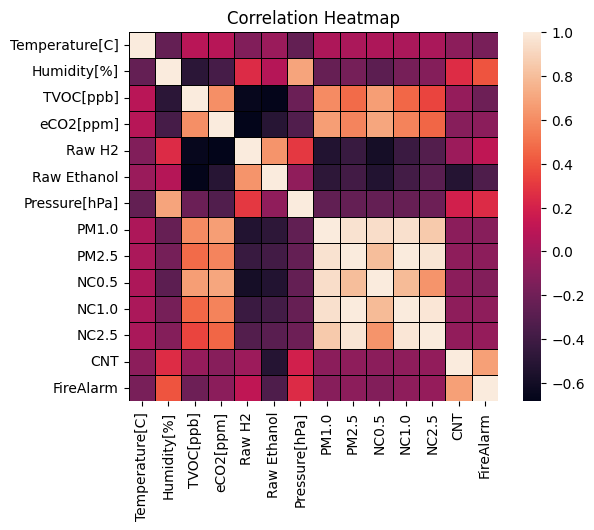

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation heatmap
sns.heatmap(df.corr(), square=True, linecolor="black", linewidths=0.5)
plt.title("Correlation Heatmap")

plt.savefig('CH map1.png')
# Display the bar plot
plt.show()

In [ ]:
corr_matrix = df.corr()
max_corr={"Column":[],"Max Corr Column":[],"Corr":[]}
for i in corr_matrix:
    column_to_exclude = i
    corr_with_others = corr_matrix.drop(column_to_exclude)[column_to_exclude]

    if i in max_corr['Max Corr Column']: continue # stop redundant rows

    highest_corr_column = corr_with_others.idxmax()
    highest_corr_value = corr_with_others.max()

    max_corr["Column"].append(i)
    max_corr["Max Corr Column"].append(highest_corr_column)
    max_corr["Corr"].append(highest_corr_value)

max_corr = pd.DataFrame(max_corr,index=None).sort_values(by="Corr",ascending=False).reset_index(drop=True)

max_corr

,Column,Max Corr Column,Corr
0,NC1.0,PM2.5,0.999787
1,NC2.5,NC1.0,0.974249
2,PM1.0,PM2.5,0.956118
3,eCO2[ppm],NC0.5,0.699604
4,Humidity[%],Pressure[hPa],0.694614
5,CNT,FireAlarm,0.673762
6,Raw H2,Raw Ethanol,0.631495
7,Temperature[C],TVOC[ppb],0.082442


# **Lab-2**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('smoke_detection_iot.csv')

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'UTC'])

print(df.columns)

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'FireAlarm'],
      dtype='object')


In [ ]:
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
df.head(3)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0


In [ ]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [ ]:
X = df.drop('FireAlarm',axis=1)
y = df['FireAlarm']

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)

vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

df1 = pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)
df1

,Feature,Variance
11,NC2.5,1159.0
7,PM1.0,1336.0
8,PM2.5,1349.0
3,eCO2[ppm],1712.0
4,Raw H2,1829.0
2,TVOC[ppb],1965.0
6,Pressure[hPa],2211.0
5,Raw Ethanol,2658.0
9,NC0.5,3092.0
1,Humidity[%],3889.0


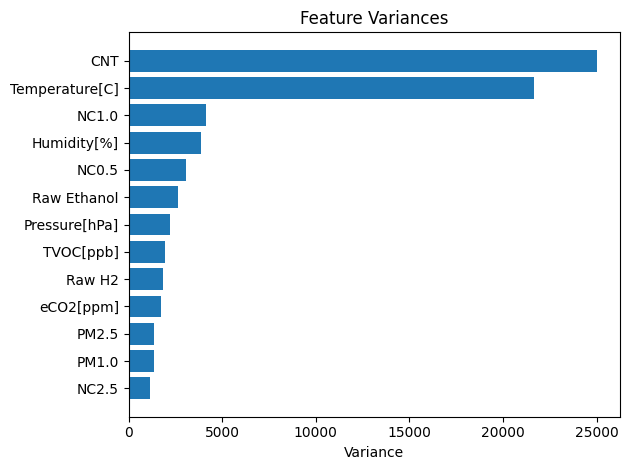

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)

vth = VarianceThreshold(threshold=0)  # as default threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

df1 = pd.DataFrame({'Feature': X_train.columns, 'Variance': vth.variances_}).sort_values('Variance', ascending=True)

# Create a bar plot of variances
plt.barh(df1['Feature'], df1['Variance'])
plt.xlabel('Variance')
plt.title('Feature Variances')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('variance_plot.png')

# Display the plot
plt.show()


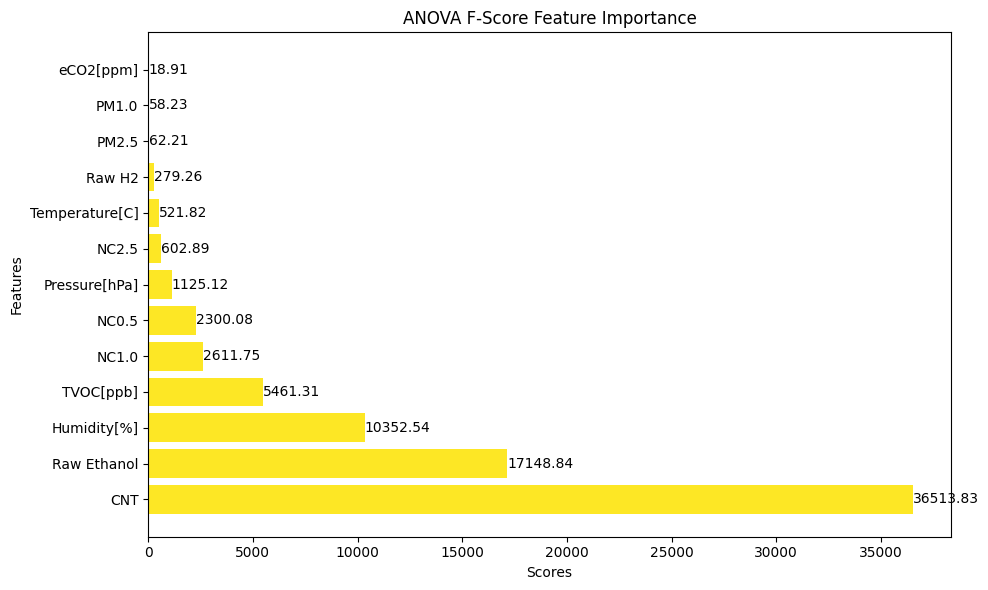

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# Apply ANOVA F-score method
Kbest_classif = SelectKBest(score_func=f_classif, k='all')
Kbest_classif.fit(X_train, y_train)

# Sort the data by scores in descending order
data = sorted(list(zip(X_train.columns, Kbest_classif.scores_)), key=lambda x: x[1], reverse=True)

# Separate the data into two lists
features = [item[0] for item in data]
scores = [item[1] for item in data]

# Create a horizontal bar plot with a color gradient
fig, ax = plt.subplots(figsize=(10, 6))
bar_colors = plt.cm.viridis(scores)  # Use a color map for the bars

bars = ax.barh(features, scores, color=bar_colors)

# Add labels and a title
ax.set_xlabel('Scores')
ax.set_ylabel('Features')
ax.set_title('ANOVA F-Score Feature Importance')

# Add the scores as text labels on the bars
for bar, score in zip(bars, scores):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{score:.2f}', va='center')

plt.tight_layout()

# Save the plot as an image file
plt.savefig('ANOVA F-score_plot1.png')

# Display the plot
plt.show()


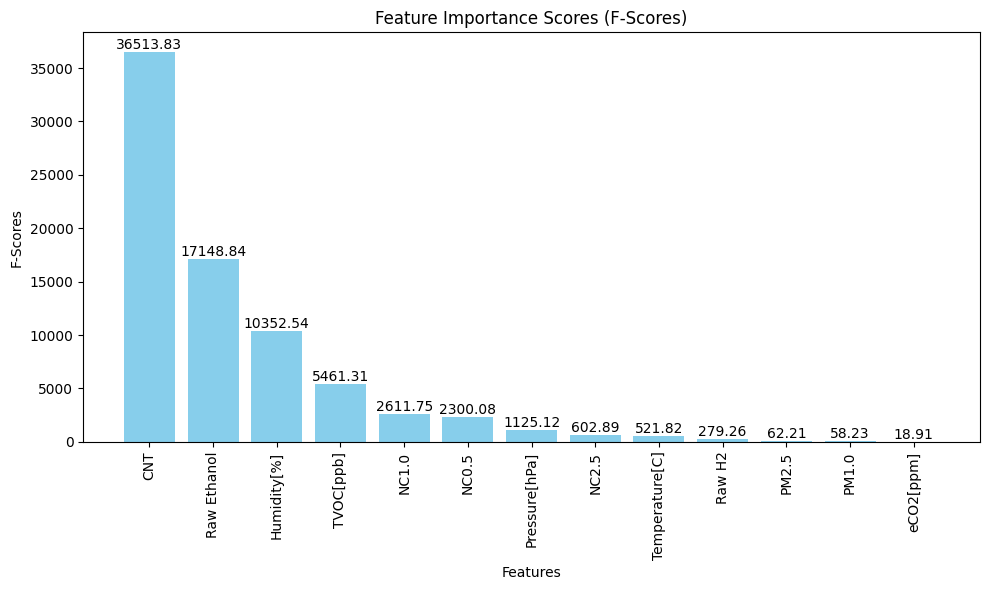

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Fit SelectKBest to your training data
Kbest_classif = SelectKBest(score_func=f_classif, k=6)
Kbest_classif.fit(X_train, y_train)

# Get the scores and feature names
scores = Kbest_classif.scores_
feature_names = X_train.columns

# Sort the scores and feature names in descending order of importance
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_scores, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Scores')
plt.title('Feature Importance Scores (F-Scores)')

# Add scores as text labels above the bars
for i, score in enumerate(sorted_scores):
    plt.text(i, score + 0.1, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
# Save the plot as an image file
plt.savefig('F-Scores_plot1.png')
plt.show()


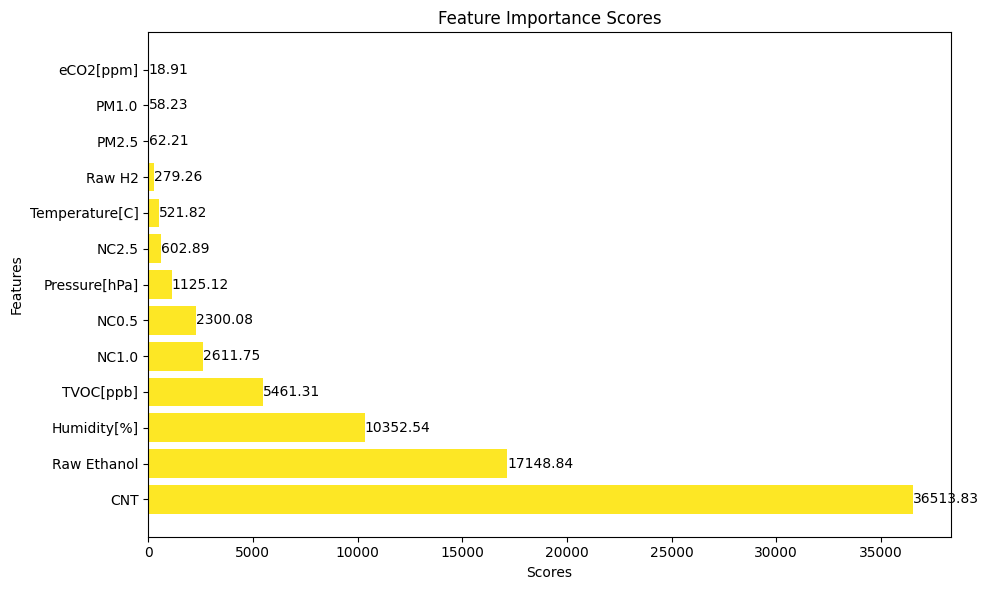

In [ ]:
import matplotlib.pyplot as plt

# Sort the data by scores in descending order
data = sorted(list(zip([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)), key=lambda x: x[1], reverse=True)

# Separate the data into two lists
features = [item[0] for item in data]
scores = [item[1] for item in data]

# Create a horizontal bar plot with a color gradient
fig, ax = plt.subplots(figsize=(10, 6))
bar_colors = plt.cm.viridis(scores)  # Use a color map for the bars

bars = ax.barh(features, scores, color=bar_colors)

# Add labels and a title
ax.set_xlabel('Scores')
ax.set_ylabel('Features')
ax.set_title('Feature Importance Scores')

# Add the scores as text labels on the bars
for bar, score in zip(bars, scores):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{score:.2f}', va='center')

plt.tight_layout()
# Save the plot as an image file
plt.savefig('F-Scores_plot2.png')
plt.show()


In [ ]:
# transform training set , but we can pick by ourself
X_train_classif = Kbest_classif.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_selected.shape: {}".format(X_train_classif.shape))
print()
# transform test data
X_test_classif = Kbest_classif.transform(X_test)

X_train.shape: (43841, 13)

X_train_selected.shape: (43841, 6)



In [ ]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver='liblinear', random_state=0)
lor.fit(X_train, y_train)

print(f'Score with all features: {round(lor.score(X_test, y_test),4)}')

lor.fit(X_train_classif, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_classif, y_test),4)}')


Score with all features: 0.9894
Score with only selected features: 0.9742


Feature 0 : 0.008
Feature 1 : 0.138
Feature 2 : 0.221
Feature 3 : 0.014
Feature 4 : 0.058
Feature 5 : 0.234
Feature 6 : 0.364
Feature 7 : 0.077
Feature 8 : 0.077
Feature 9 : 0.07
Feature 10 : 0.069
Feature 11 : 0.013
Feature 12 : 0.31



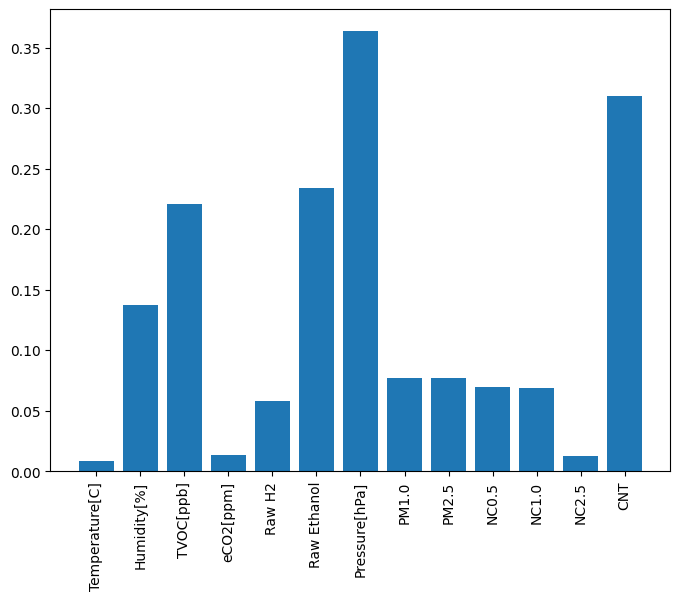

In [ ]:
from sklearn.feature_selection import mutual_info_classif

infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)

infogain_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],3)}')

print()

# plot the scores
plt.bar([X_train.columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
# Save the plot as an image file
plt.savefig('Feature-Scores_plot3.png')
plt.show()

Feature 0 : 0.009
Feature 1 : 0.137
Feature 2 : 0.219
Feature 3 : 0.015
Feature 4 : 0.058
Feature 5 : 0.232
Feature 6 : 0.364
Feature 7 : 0.075
Feature 8 : 0.075
Feature 9 : 0.07
Feature 10 : 0.072
Feature 11 : 0.016
Feature 12 : 0.31


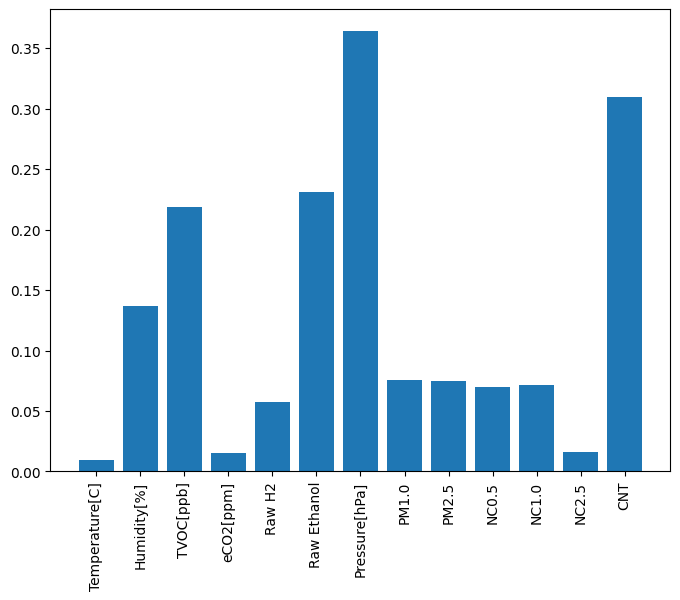

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)

infogain_classif.fit(X_train, y_train)

# What are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i], 3)}')

# Plot the scores
plt.bar([X_train.columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8, 6)

# Save the plot as a PNG
plt.savefig("Feature-Scores_plot4.png", bbox_inches='tight')

plt.show()


Feature 0 : 0.004
Feature 1 : 0.136
Feature 2 : 0.219
Feature 3 : 0.016
Feature 4 : 0.056
Feature 5 : 0.235
Feature 6 : 0.362
Feature 7 : 0.076
Feature 8 : 0.077
Feature 9 : 0.064
Feature 10 : 0.071
Feature 11 : 0.013
Feature 12 : 0.31



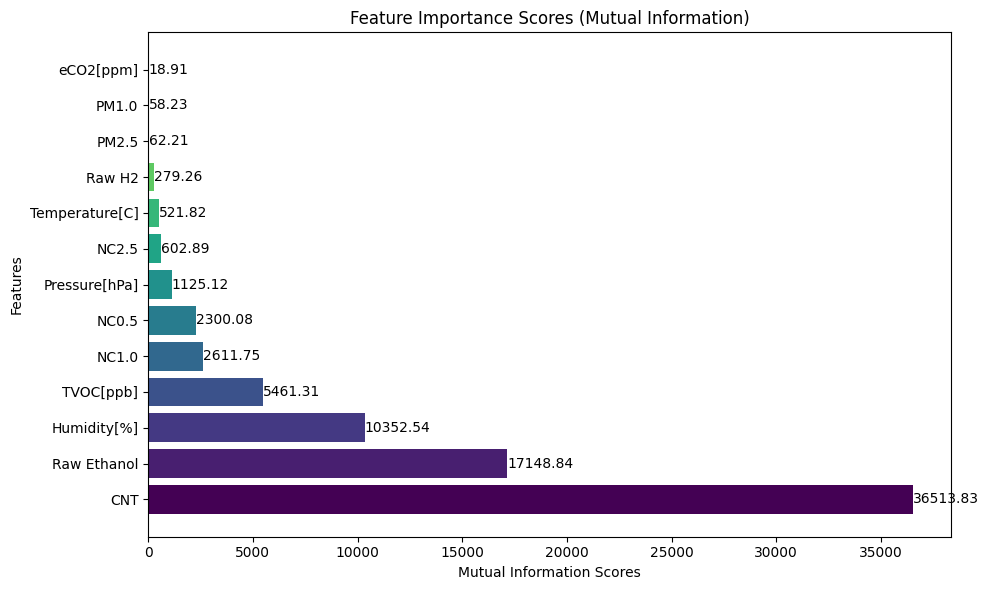

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for np.linspace
from sklearn.feature_selection import SelectKBest, mutual_info_classif

infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)
infogain_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],3)}')

print()

# Create a horizontal bar plot with color gradient
plt.figure(figsize=(10, 6))
bar_colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_scores)))  # Use a color map for the bars

bars = plt.barh(sorted_feature_names, sorted_scores, color=bar_colors)

# Add scores as text labels to the right of the bars
for bar, score in zip(bars, sorted_scores):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{score:.2f}', va='center')

plt.xlabel('Mutual Information Scores')
plt.ylabel('Features')
plt.title('Feature Importance Scores (Mutual Information)')

plt.tight_layout()
# Save the plot as an image file
plt.savefig('Feature Importance Scores (Mutual Information) plot1.png')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectPercentile
percentile = SelectPercentile(percentile=50)
percentile.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [ ]:
percentile.get_support()

array([False,  True,  True, False, False,  True, False, False, False,
        True,  True, False,  True])

In [ ]:
X_train.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe_features = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=6)

rfe_features.fit(X_train, y_train)

rfe_features.get_support()  # how can we know which column is true

array([False,  True,  True, False, False,  True,  True, False, False,
        True, False, False,  True])

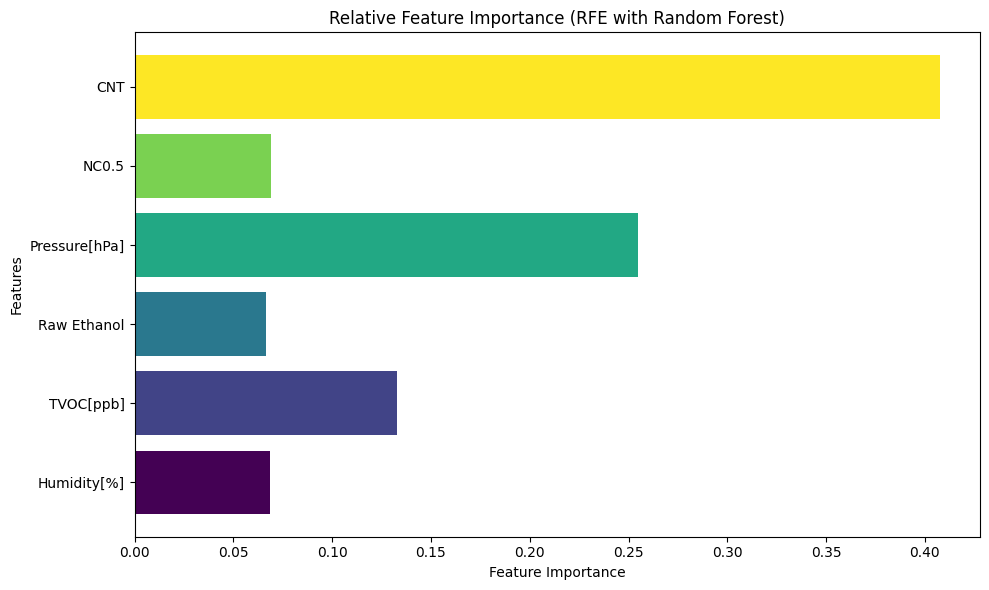

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Fit RFE to select features
rfe_features = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=6)
rfe_features.fit(X_train, y_train)

# Get the indices of selected features
selected_feature_indices = np.where(rfe_features.support_)[0]

# Get the feature importances from the fitted Random Forest classifier
feature_importances = rfe_features.estimator_.feature_importances_

# Create a horizontal bar plot to show feature importances
plt.figure(figsize=(10, 6))
bar_colors = plt.cm.viridis(np.linspace(0, 1, len(selected_feature_indices)))

bars = plt.barh([X_train.columns[i] for i in selected_feature_indices], feature_importances, color=bar_colors)

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Relative Feature Importance (RFE with Random Forest)')

plt.tight_layout()

# Save the plot as a PNG
plt.savefig("RFE with Random Forest plot.png", bbox_inches='tight')

plt.show()


In [ ]:
from sklearn.feature_selection import RFECV


rfecv = RFECV(estimator=RandomForestClassifier() , step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 3
Best features : Index(['TVOC[ppb]', 'Pressure[hPa]', 'CNT'], dtype='object')


In [ ]:
df_corr = pd.DataFrame(df.corrwith(df['FireAlarm']),columns='correlation'.split(','))

In [ ]:
df_corr

,correlation
Temperature[C],-0.106453
Humidity[%],0.438062
TVOC[ppb],0.332511
eCO2[ppm],-0.019519
Raw H2,0.077128
Raw Ethanol,-0.532279
Pressure[hPa],0.162916
PM1.0,0.034360
PM2.5,0.036015
NC0.5,0.219461


In [ ]:
df_corr.style.bar(color='lightgreen',subset=['correlation'])

,correlation
Temperature[C],-0.106453
Humidity[%],0.438062
TVOC[ppb],0.332511
eCO2[ppm],-0.019519
Raw H2,0.077128
Raw Ethanol,-0.532279
Pressure[hPa],0.162916
PM1.0,0.034360
PM2.5,0.036015
NC0.5,0.219461


<Figure size 1000x600 with 0 Axes>

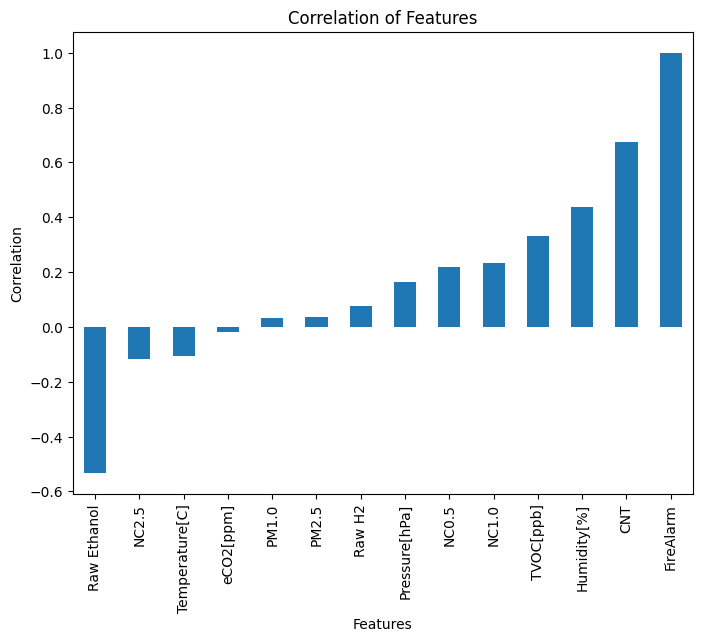

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by 'correlation' column in ascending order
sorted_df_corr = df_corr.sort_values(by=['correlation'], ascending=True)

# Create a bar plot using the DataFrame index as x-axis values
plt.figure(figsize=(10, 6))
sorted_df_corr.plot(kind='bar', legend=False)

plt.xlabel('Features')  # You can change 'Features' to the appropriate label
plt.ylabel('Correlation')
plt.title('Correlation of Features')

# Save the plot in PDF format
#plt.savefig('correlation_plot.pdf', format='pdf')

# Save the plot in PNG format
plt.savefig('Correlation of Features_plot.png', format='png')

# Display the plot
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00959901, 0.13766928, 0.21922786, 0.01468095, 0.06152425,
       0.23424342, 0.36423598, 0.07616832, 0.07461539, 0.0698048 ,
       0.06806559, 0.01293652, 0.30871212])

In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([1.27360626e+06, 1.39566271e+06, 1.67791323e+06, 1.14096340e+04,
        1.16131635e+04, 2.09171523e+06, 2.07611866e+05, 5.85861417e+03,
        6.22821633e+03, 5.10600650e+05, 8.29967999e+05, 1.29584058e+05,
        1.09214521e+08]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

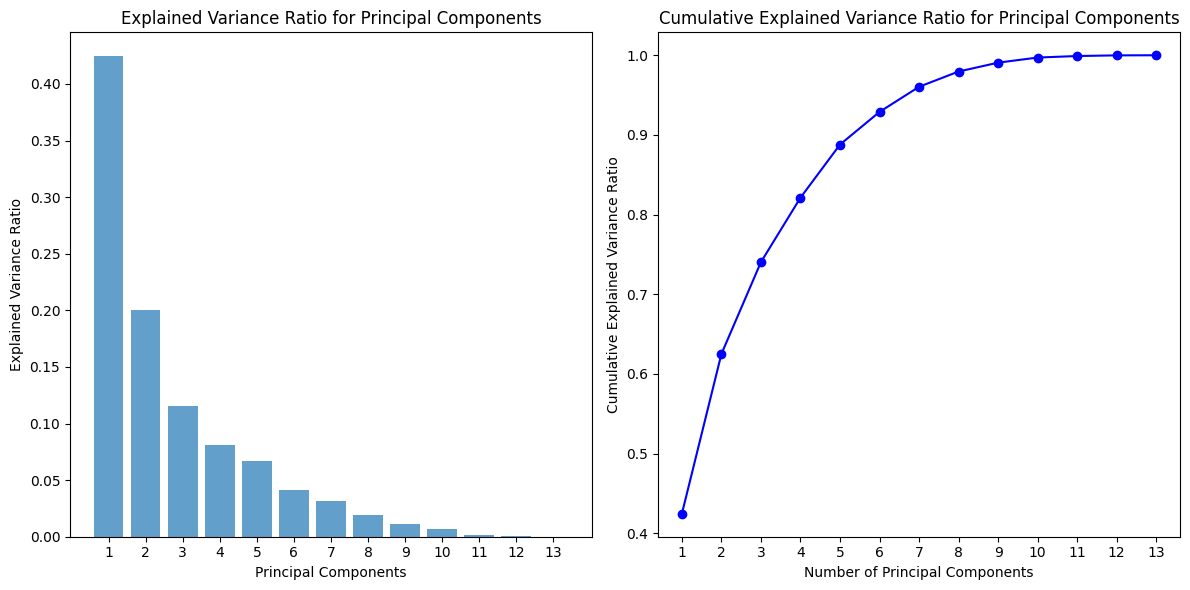

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Choose the number of principal components you want to retain
n_components = 13  # Change this to the desired number of components

# Create a PCA model and fit it to the scaled data
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame to store the principal components and name them
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Assign the original feature names to the retained principal components
principal_df.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
                        'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
                        'NC2.5', 'CNT']

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(12, 6))

# Bar plot for explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

# Line plot for cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

plt.tight_layout()

plt.show()

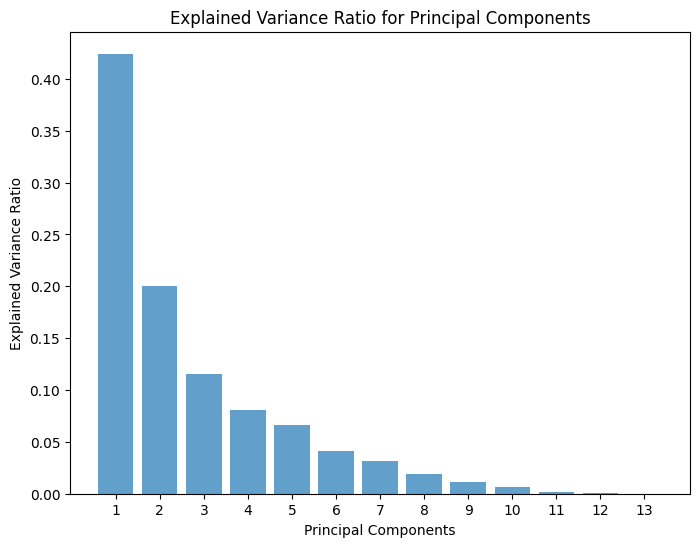

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Choose the number of principal components you want to retain
n_components = 13  # Change this to the desired number of components

# Create a PCA model and fit it to the scaled data
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame to store the principal components and name them
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Assign the original feature names to the retained principal components
principal_df.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
                        'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
                        'NC2.5', 'CNT']

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Bar plot for explained variance ratio
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

# Save the plot
plt.savefig('Explained_Variance_Ratio_Plot1.png')

plt.show()


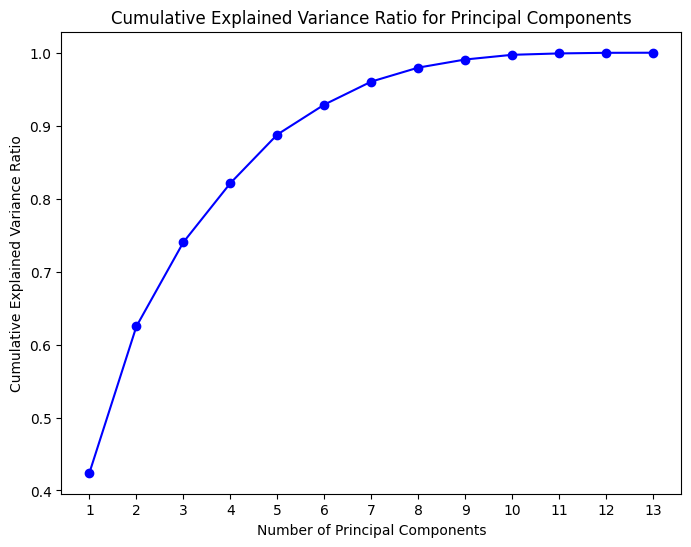

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Choose the number of principal components you want to retain
n_components = 13  # Change this to the desired number of components

# Create a PCA model and fit it to the scaled data
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame to store the principal components and name them
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Assign the original feature names to the retained principal components
principal_df.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
                        'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
                        'NC2.5', 'CNT']

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Line plot for cumulative explained variance
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

# Save the plot
plt.savefig('Cumulative_Explained_Variance_Ratio_Plot1.png')

plt.show()


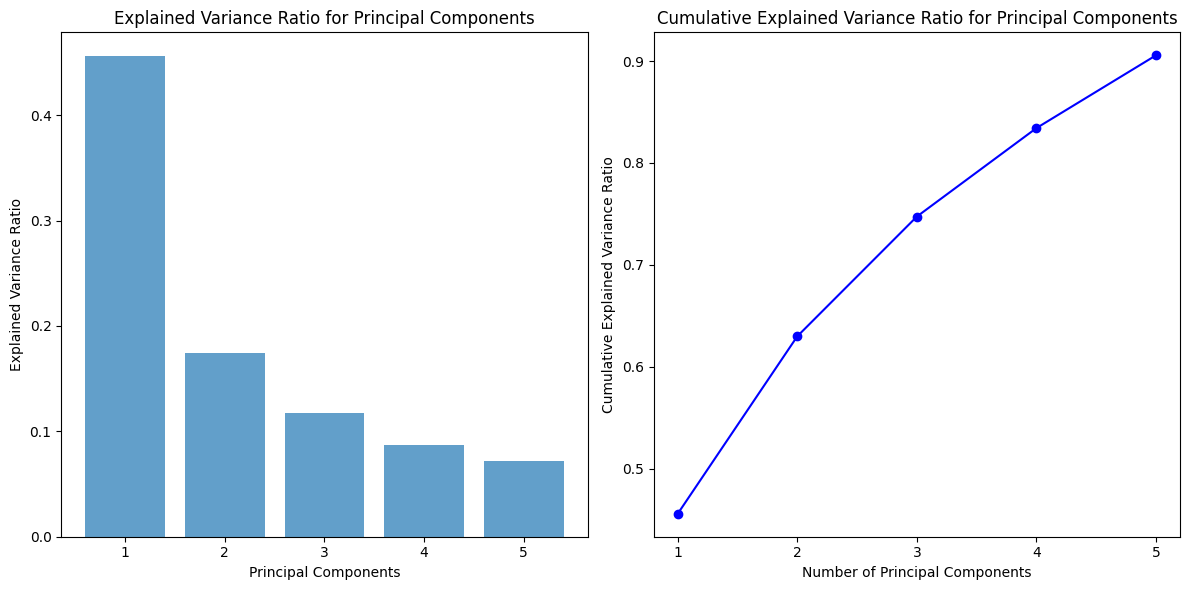

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data

# Separate the target variable (if applicable)
y = df['FireAlarm']  # Replace 'TargetColumn' with your target variable column name
X = df.drop(columns=['FireAlarm'])

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA model
n_components = 5  # Change this to the desired number of components
pca = PCA(n_components=n_components)

# Fit the PCA model to the scaled data
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame to store the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(12, 6))

# Bar plot for explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

# Line plot for cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

plt.tight_layout()

plt.show()

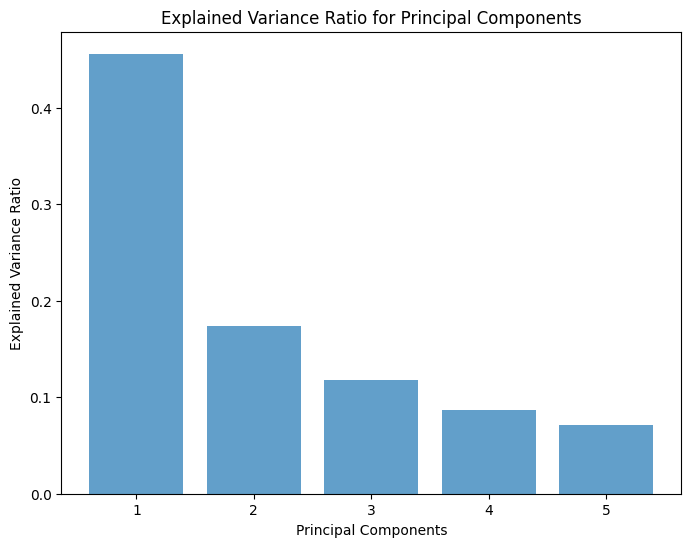

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data

# Separate the target variable (if applicable)
y = df['FireAlarm']  # Replace 'TargetColumn' with your target variable column name
X = df.drop(columns=['FireAlarm'])

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA model
n_components = 5  # Change this to the desired number of components
pca = PCA(n_components=n_components)

# Fit the PCA model to the scaled data
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame to store the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Bar plot for explained variance ratio
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

# Save the plot
plt.savefig('Explained_Variance_Ratio_Plot2.png')

plt.show()


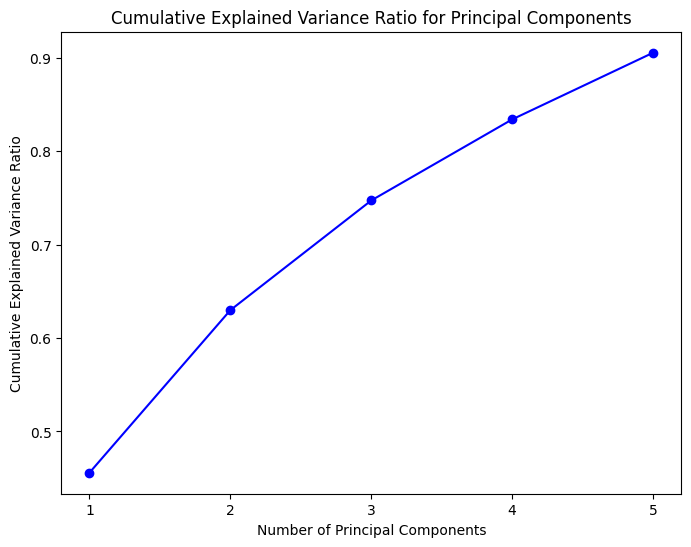

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data

# Separate the target variable (if applicable)
y = df['FireAlarm']  # Replace 'TargetColumn' with your target variable column name
X = df.drop(columns=['FireAlarm'])

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA model
n_components = 5  # Change this to the desired number of components
pca = PCA(n_components=n_components)

# Fit the PCA model to the scaled data
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame to store the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Line plot for cumulative explained variance
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Principal Components')
plt.xticks(range(1, n_components + 1))

# Save the plot
plt.savefig('Cumulative_Explained_Variance_Ratio_Plot2.png')

plt.show()


# **Lab-3**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
df = pd.read_csv('smoke_detection_iot.csv')

In [ ]:
df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head

<bound method NDFrame.head of        Unnamed: 0    UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0               0   5744           16941         3283          0          0   
1               1   5745           16954         3214          0          0   
2               2   5746           16966         3143          0          0   
3               3   5747           16979         3075          0          0   
4               4   5748           16994         3016          0          0   
...           ...    ...             ...          ...        ...        ...   
62625       62625  62625           15751          404        571          0   
62626       62626  62626           15905          412        559          0   
62627       62627  62627           16065          409        573          0   
62628       62628  62628           16219          427        584          0   
62629       62629  62629           16384          470        589          0   

       Raw H2  Raw Et

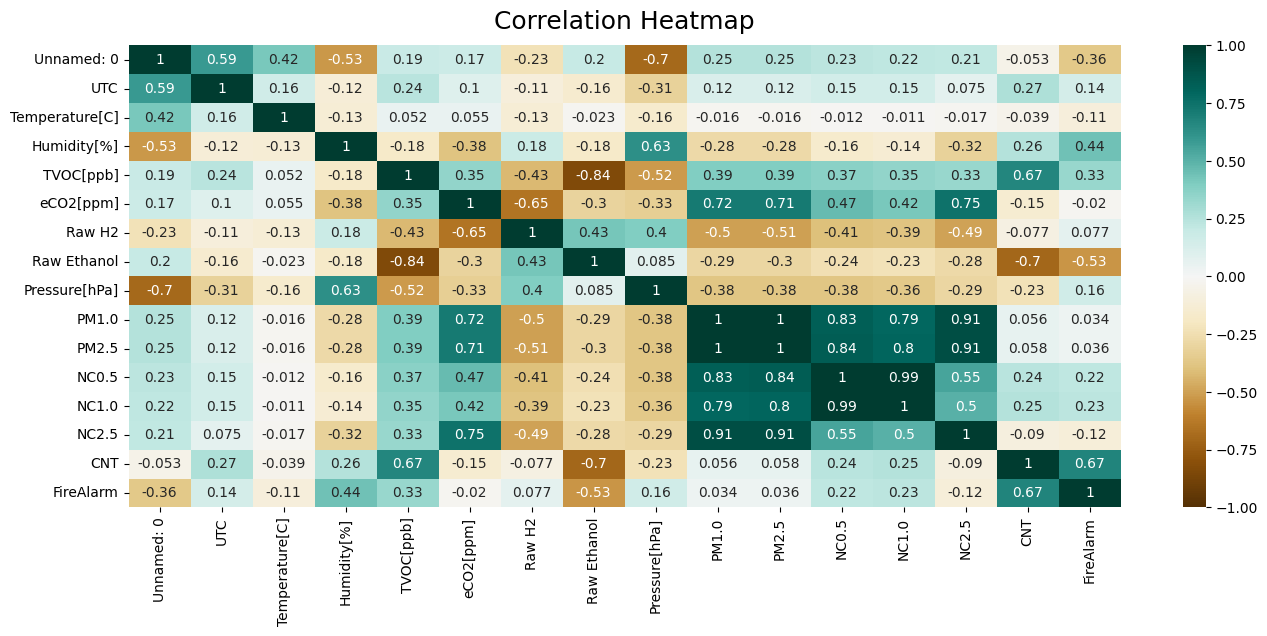

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

# Save the plot
plt.savefig('Correlation Heatmap_Plot2.png')
plt.show()

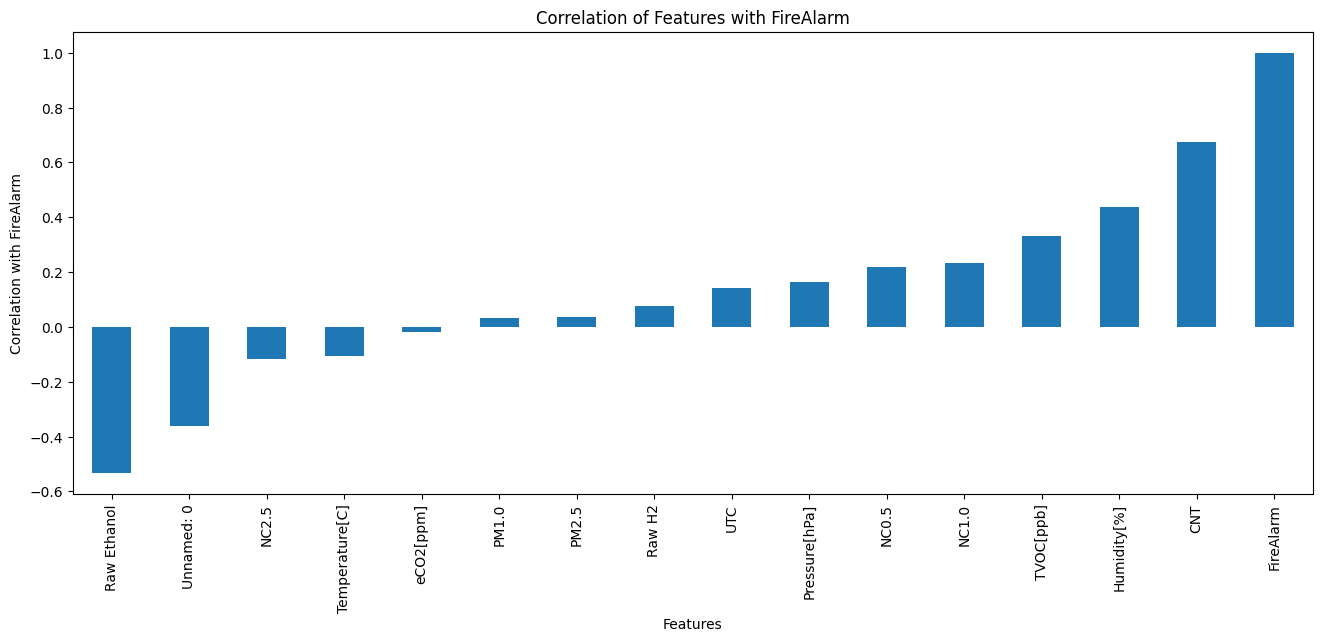

In [ ]:
df.corrwith(df['FireAlarm']).sort_values(ascending=True).plot(kind='bar', figsize=(16, 6))

plt.xlabel('Features')
plt.ylabel('Correlation with FireAlarm')
plt.title('Correlation of Features with FireAlarm')

# Save the plot
plt.savefig('Correlation of Features with FireAlarm_Plotx.png')
plt.show()

In [ ]:
X = df[df.columns[:-1]]
y = df['FireAlarm']

[[1831    0]
 [   0 4432]]


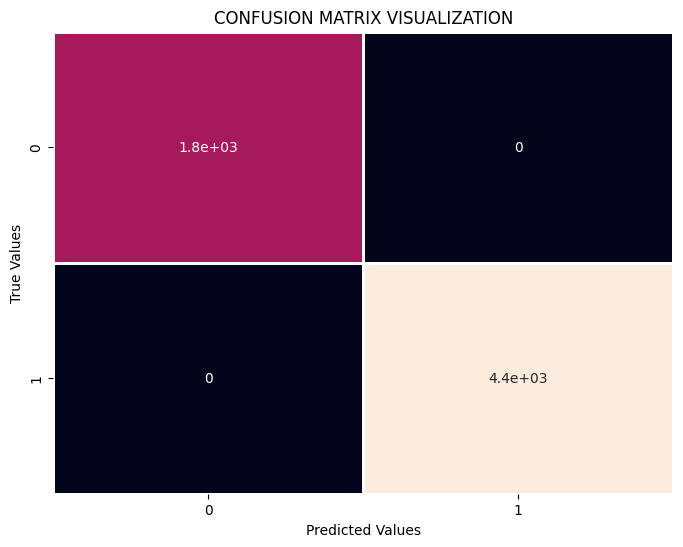

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
# Save the plot
plt.savefig('CONFUSION MATRIX VISUALIZATION_DecisionTree.png')
plt.show()

In [ ]:
acc = accuracy_score(y_test,y_pred)
print(acc)

1.0


In [ ]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1831
           1       1.00      1.00      1.00      4432

    accuracy                           1.00      6263
   macro avg       1.00      1.00      1.00      6263
weighted avg       1.00      1.00      1.00      6263



In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

1.0

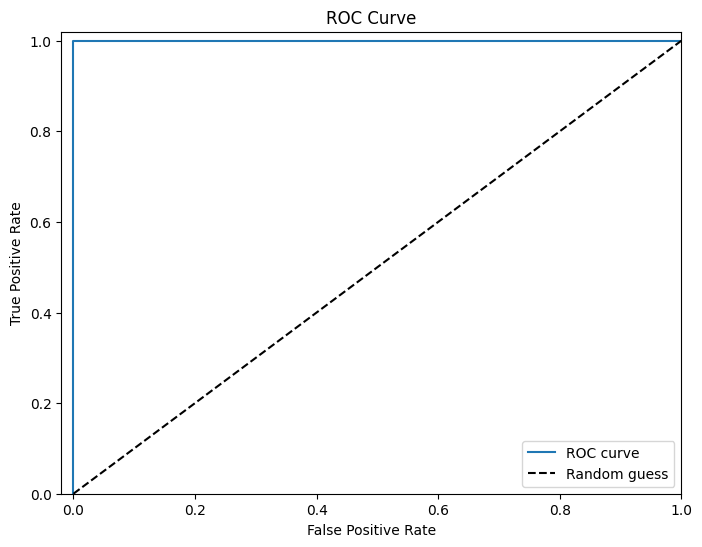

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

# Save the plot in PDF format
#plt.savefig('roc_curve.pdf', format='pdf')

# Save the plot in PNG format
plt.savefig('roc_curve.png', format='png')
# Display the plot
plt.show()

# **Lab-4**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
df = pd.read_csv('smoke_detection_iot.csv')

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'UTC'])

In [ ]:
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
X = df[df.columns[:-1]]
y = df['FireAlarm']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Decision Tree


[[1725    0]
 [   0 4538]]


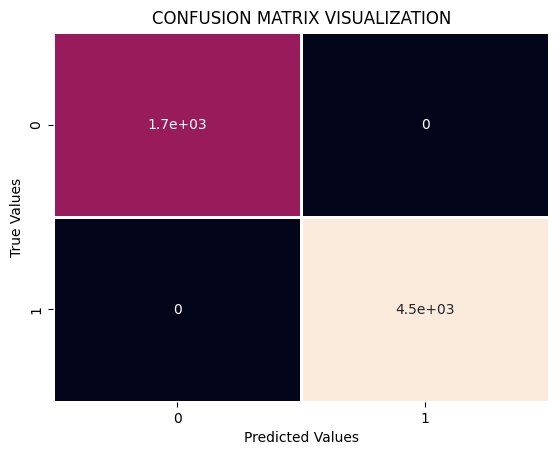

In [ ]:
model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
# Save the plot in PNG format
plt.savefig('CONFUSION MATRIX DecisionTree1.png', format='png')
plt.show()

In [ ]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1725
           1       1.00      1.00      1.00      4538

    accuracy                           1.00      6263
   macro avg       1.00      1.00      1.00      6263
weighted avg       1.00      1.00      1.00      6263



# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


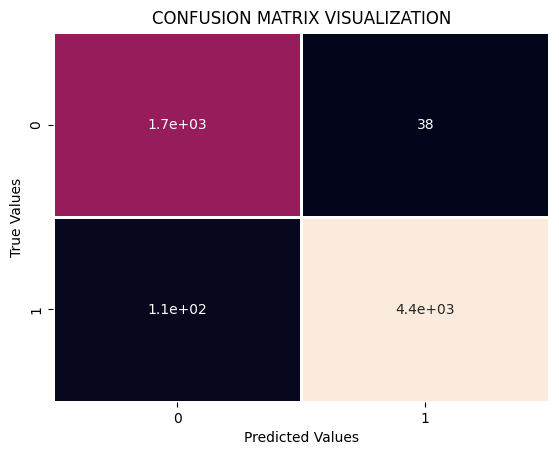

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1 Score: 0.98
Confusion Matrix:
[[1687   38]
 [ 113 4425]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1725
           1       0.99      0.98      0.98      4538

    accuracy                           0.98      6263
   macro avg       0.96      0.98      0.97      6263
weighted avg       0.98      0.98      0.98      6263



In [ ]:
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
# Save the plot in PNG format
plt.savefig('CONFUSION MATRIX LogisticRegression.png', format='png')
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = [
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Plot and save the confusion matrix
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, lw=2, cbar=False)
    plt.ylabel("True Values")
    plt.xlabel("Predicted Values")
    plt.title(f"CONFUSION MATRIX VISUALIZATION - {model.__class__.__name__}")
    plt.savefig(f'{model.__class__.__name__}_confusion_matrix.png')
    plt.close()

    # Print or store the evaluation metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("\n")


Model: RandomForestClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00
Confusion Matrix:
[[1725    0]
 [   0 4538]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1725
           1       1.00      1.00      1.00      4538

    accuracy                           1.00      6263
   macro avg       1.00      1.00      1.00      6263
weighted avg       1.00      1.00      1.00      6263



Model: SVC
Accuracy: 0.98
Precision: 1.00
Recall: 0.98
F1 Score: 0.99
ROC-AUC: 0.99
Confusion Matrix:
[[1708   17]
 [  88 4450]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1725
           1       1.00      0.98      0.99      4538

    accuracy                           0.98      6263
   macro avg       0.97      0.99      0.98      6263
weighted avg       0.98      0.98      0.98      6263



Model: KNeighborsCl

In [ ]:
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
models = [
    GaussianNB(),
   # XGBClassifier(),
   # LGBMClassifier(),  #causing errors so I removed them.
    MLPClassifier()
]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Plot and save the confusion matrix
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, lw=2, cbar=False)
    plt.ylabel("True Values")
    plt.xlabel("Predicted Values")
    plt.title(f"CONFUSION MATRIX VISUALIZATION - {model.__class__.__name__}")
    plt.savefig(f'{model.__class__.__name__}_confusion_matrix.png')
    plt.close()

    # Print or store the evaluation metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("\n")


Model: GaussianNB
Accuracy: 0.79
Precision: 0.79
Recall: 0.98
F1 Score: 0.87
ROC-AUC: 0.64
Confusion Matrix:
[[ 528 1197]
 [ 110 4428]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.31      0.45      1725
           1       0.79      0.98      0.87      4538

    accuracy                           0.79      6263
   macro avg       0.81      0.64      0.66      6263
weighted avg       0.80      0.79      0.75      6263



Model: MLPClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00
Confusion Matrix:
[[1715   10]
 [  14 4524]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1725
           1       1.00      1.00      1.00      4538

    accuracy                           1.00      6263
   macro avg       0.99      1.00      1.00      6263
weighted avg       1.00      1.00      1.00      6263





# Some more Models


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
import warnings

# Filter out LightGBM warnings
warnings.filterwarnings("ignore")

In [ ]:
# Add these models to the list of models
models.extend([
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RidgeClassifier(),
    SGDClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    HistGradientBoostingClassifier(),
    MLPClassifier(max_iter=1000)
])

In [ ]:

with open("warnings.log", "w"):
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)



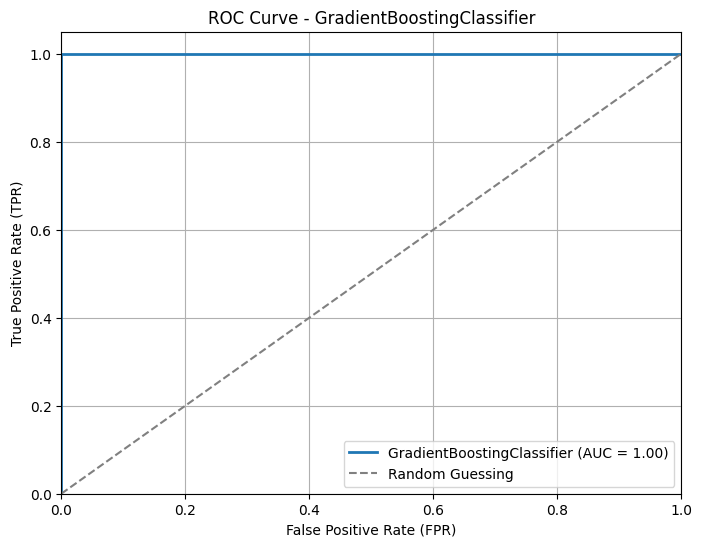

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Assuming X_train, X_test, y_train, y_test are defined before this code snippet

# Model specific code
model = GradientBoostingClassifier()
model_name = model.__class__.__name__

# Fit the model
model.fit(X_train, y_train)

# Check if the model supports predict_proba
if hasattr(model, "predict_proba"):
    # Get predicted probabilities for positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
else:
    # For models without predict_proba, use decision_function or predict directly
    if hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_test)
    else:
        y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig(f'{model_name}_ROC_Curve.png')

# Show the plot
plt.show()


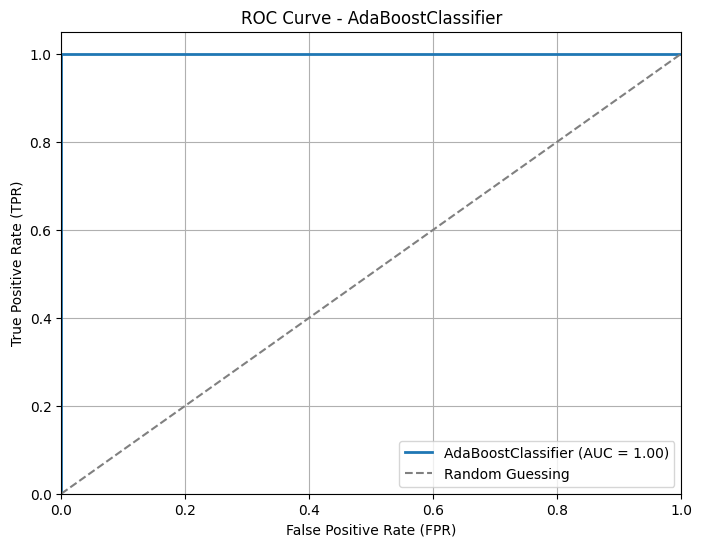

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

# Model specific code
model = AdaBoostClassifier()
model_name = model.__class__.__name__

# Fit the model
model.fit(X_train, y_train)

# Check if the model supports predict_proba
if hasattr(model, "predict_proba"):
    # Get predicted probabilities for positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
else:
    # For models without predict_proba, use decision_function or predict directly
    if hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_test)
    else:
        y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig(f'{model_name}_ROC_Curve.png')

# Show the plot
plt.show()


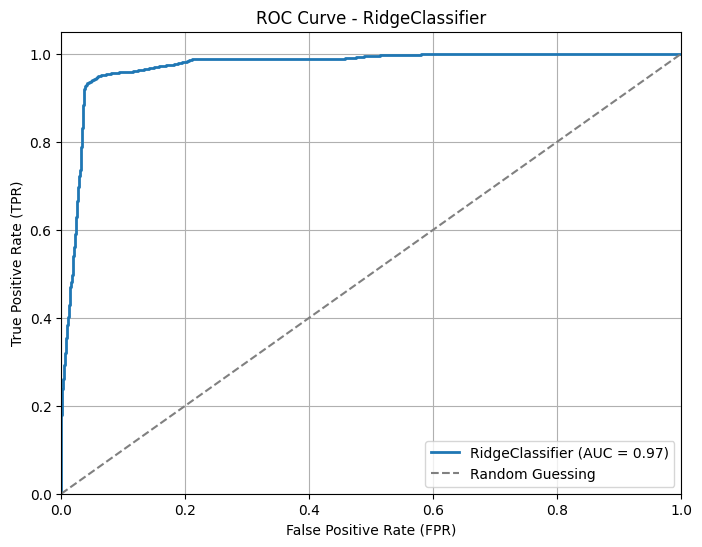

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier

# Assuming X_train, X_test, y_train, y_test are defined before this code snippet

# Model specific code
model = RidgeClassifier()
model_name = model.__class__.__name__

# Fit the model
model.fit(X_train, y_train)

# Check if the model supports predict_proba
if hasattr(model, "decision_function"):
    # Get decision function values
    y_pred_prob = model.decision_function(X_test)
else:
    # For models without decision_function, use predict directly
    y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig(f'{model_name}_ROC_Curve.png')

# Show the plot
plt.show()


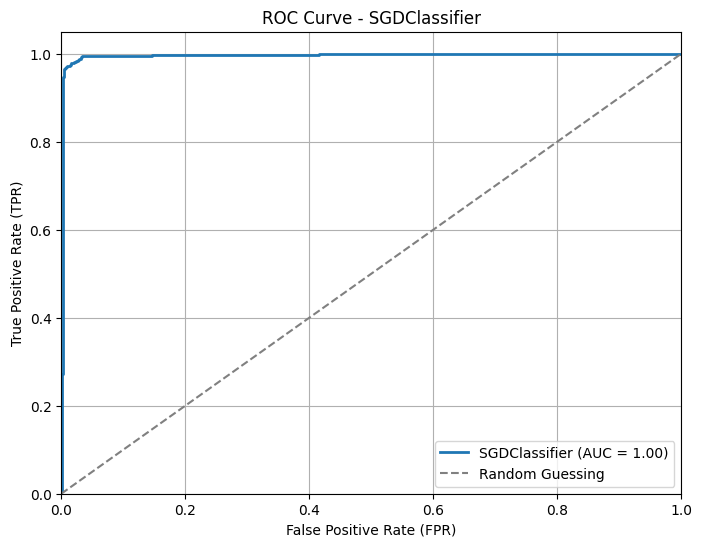

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# Assuming X_train, X_test, y_train, y_test are defined before this code snippet

# Model specific code
model = SGDClassifier()
model_name = model.__class__.__name__

# Fit the model
model.fit(X_train, y_train)

# Check if the model supports predict_proba
if hasattr(model, "decision_function"):
    # Get decision function values
    y_pred_prob = model.decision_function(X_test)
else:
    # For models without decision_function, use predict directly
    y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig(f'{model_name}_ROC_Curve.png')

# Show the plot
plt.show()


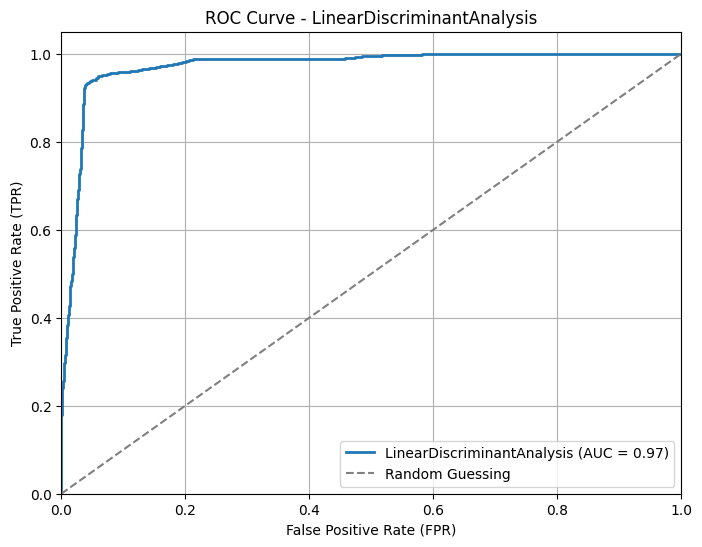

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming X_train, X_test, y_train, y_test are defined before this code snippet

# Model specific code
model = LinearDiscriminantAnalysis()
model_name = model.__class__.__name__

# Fit the model
model.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig(f'{model_name}_ROC_Curve.png')

# Show the plot
plt.show()


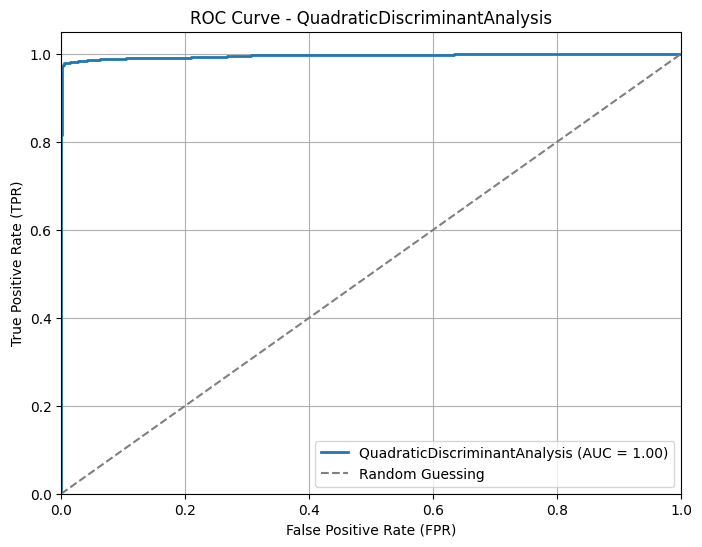

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Assuming X_train, X_test, y_train, y_test are defined before this code snippet

# Model specific code
model = QuadraticDiscriminantAnalysis()
model_name = model.__class__.__name__

# Fit the model
model.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig(f'{model_name}_ROC_Curve.png')

# Show the plot
plt.show()


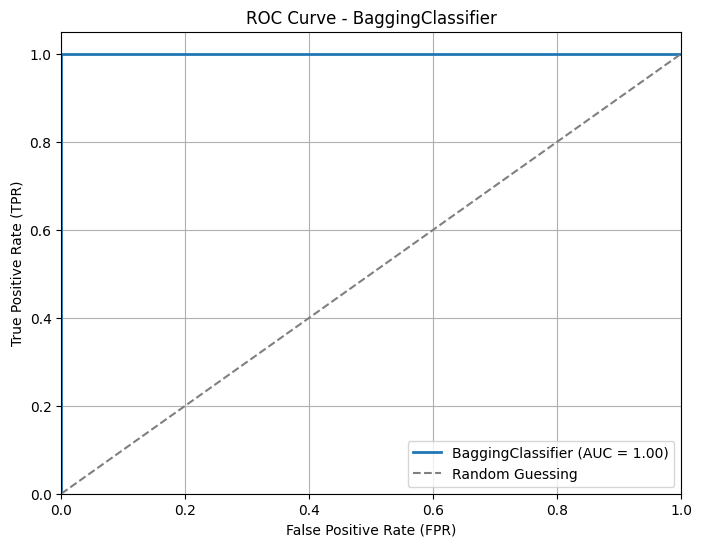

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier

# Assuming X_train, X_test, y_train, y_test are defined before this code snippet

# Model specific code
model = BaggingClassifier()
model_name = model.__class__.__name__

# Fit the model
model.fit(X_train, y_train)

# Check if the model supports predict_proba
if hasattr(model, "predict_proba"):
    # Get predicted probabilities for positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
else:
    # For models without predict_proba, use decision_function or predict directly
    if hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_test)
    else:
        y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig(f'{model_name}_ROC_Curve.png')

# Show the plot
plt.show()


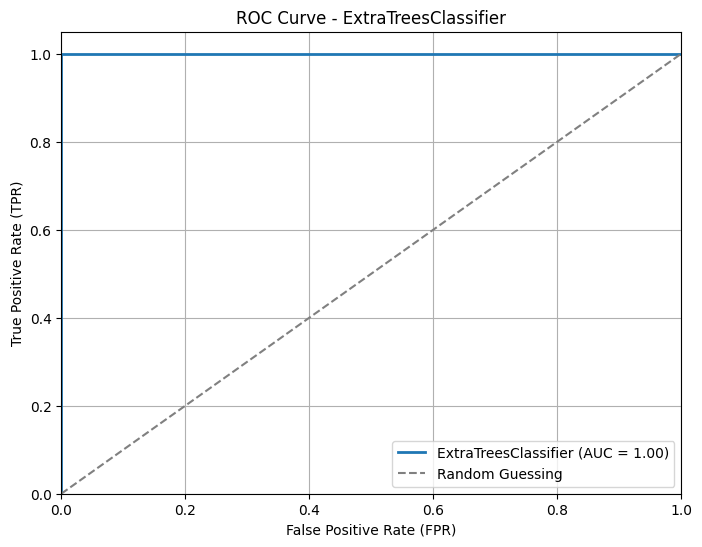

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Assuming X_train, X_test, y_train, y_test are defined before this code snippet

# Model specific code
model = ExtraTreesClassifier()
model_name = model.__class__.__name__

# Fit the model
model.fit(X_train, y_train)

# Check if the model supports predict_proba
if hasattr(model, "predict_proba"):
    # Get predicted probabilities for positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
else:
    # For models without predict_proba, use decision_function or predict directly
    if hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_test)
    else:
        y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig(f'{model_name}_ROC_Curve.png')

# Show the plot
plt.show()


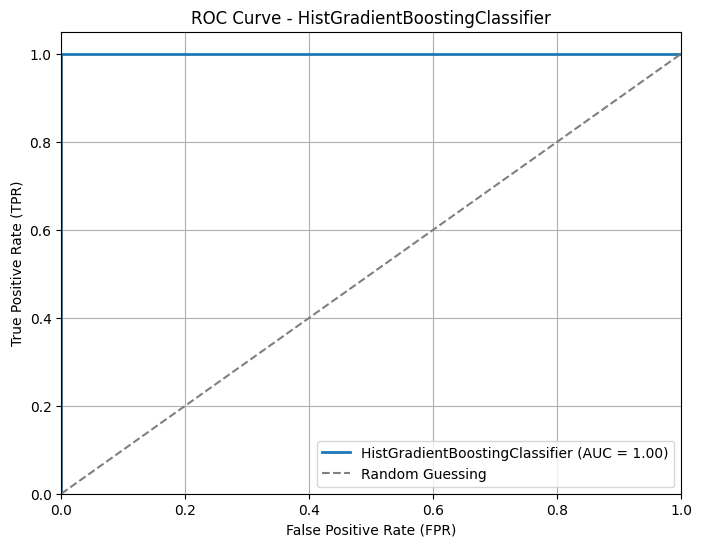

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier

# Assuming X_train, X_test, y_train, y_test are defined before this code snippet

# Model specific code
model = HistGradientBoostingClassifier()
model_name = model.__class__.__name__

# Fit the model
model.fit(X_train, y_train)

# Check if the model supports predict_proba
if hasattr(model, "predict_proba"):
    # Get predicted probabilities for positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
else:
    # For models without predict_proba, use decision_function or predict directly
    if hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_test)
    else:
        y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig(f'{model_name}_ROC_Curve.png')

# Show the plot
plt.show()


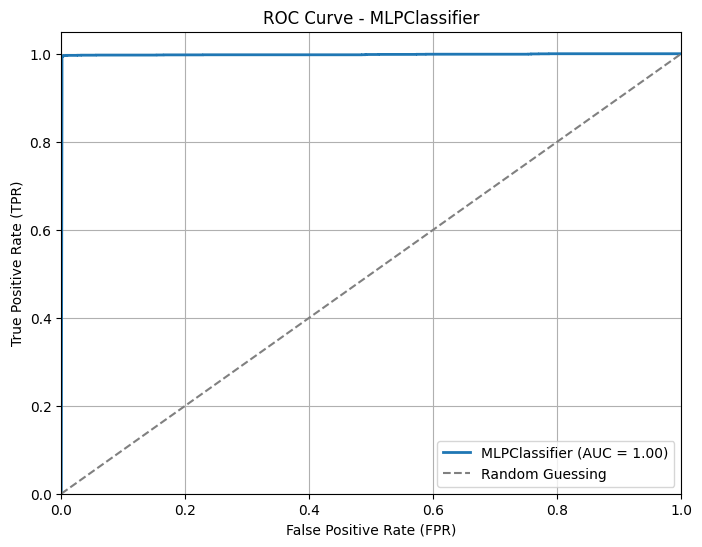

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Assuming X_train, X_test, y_train, y_test are defined before this code snippet

# Model specific code
model = MLPClassifier(max_iter=1000)
model_name = model.__class__.__name__

# Fit the model
model.fit(X_train, y_train)

# Check if the model supports predict_proba
if hasattr(model, "predict_proba"):
    # Get predicted probabilities for positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
else:
    # For models without predict_proba, use decision_function or predict directly
    if hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_test)
    else:
        y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig(f'{model_name}_ROC_Curve.png')

# Show the plot
plt.show()


# **Lab-5**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

In [ ]:
data = pd.read_csv('smoke_detection_iot.csv')
data = data.drop(columns=['Unnamed: 0', 'UTC'])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
scaled_data

array([[ 0.28062169,  0.99494707, -0.24861434, ..., -0.07388861,
        -1.38347572, -1.58245641],
       [ 0.2816663 ,  0.91711549, -0.24861434, ..., -0.07388861,
        -1.38334411, -1.58245641],
       [ 0.28264127,  0.83702792, -0.24861434, ..., -0.07388861,
        -1.38321249, -1.58245641],
       ...,
       [ 0.20171901, -3.68848353, -0.16834834, ..., -0.07387569,
        -0.62786328, -1.58245641],
       [ 0.21676136, -3.66592365, -0.16694016, ..., -0.07387569,
        -0.62773167, -1.58245641],
       [ 0.23180371, -3.61177995, -0.16630008, ..., -0.07387569,
        -0.62760005, -1.58245641]])

In [ ]:
# ONLY FOR KMEAN
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(scaled_data)

In [ ]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
silhouette = silhouette_score(scaled_data, labels)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels)
davies_bouldin = davies_bouldin_score(scaled_data, labels)
normalized_mutual_info = normalized_mutual_info_score(data['FireAlarm'].values, labels)
adjusted_rand = adjusted_rand_score(data['FireAlarm'].values, labels)
adjusted_mutual_info = adjusted_mutual_info_score(data['FireAlarm'].values, labels)
v_measure = v_measure_score(data['FireAlarm'].values, labels)
completeness = completeness_score(data['FireAlarm'].values, labels)
homogeneity = homogeneity_score(data['FireAlarm'].values, labels)


print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Normalized Mutual Info: {normalized_mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Adjusted Mutual Info: {adjusted_mutual_info:.4f}")
print(f"V-Measure: {v_measure:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")

Silhouette Score: 0.8683
Calinski-Harabasz Score: 36688.2531
Davies-Bouldin Score: 0.6183
Normalized Mutual Info: 0.0187
Adjusted Rand Index: 0.0225
Adjusted Mutual Info: 0.0186
V-Measure: 0.0187
Completeness Score: 0.1067
Homogeneity Score: 0.0102


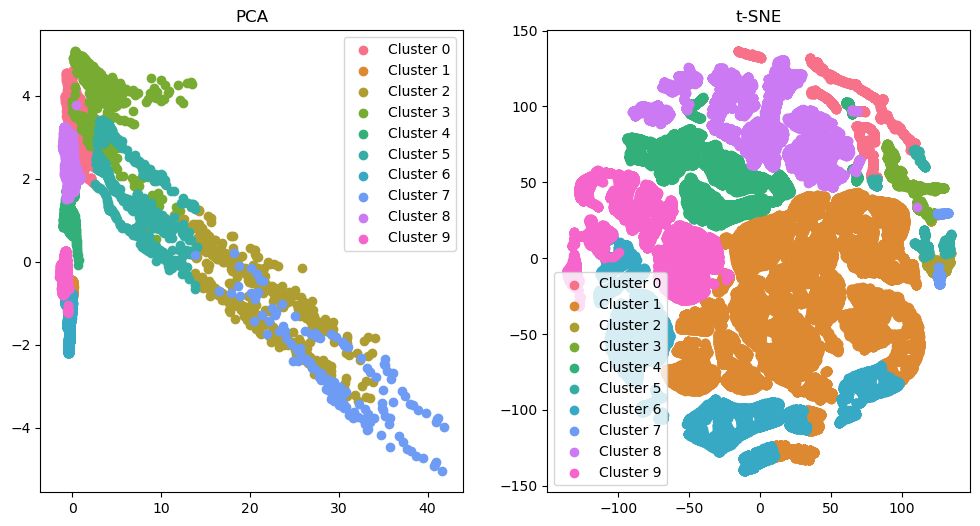

In [ ]:
import seaborn as sns

# Apply dimensionality reduction techniques
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_result = pca.fit_transform(scaled_data)
tsne_result = tsne.fit_transform(scaled_data)

# Cluster the data (you need to specify the number of clusters)
num_clusters = 10  # Replace with your desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(scaled_data)

# Create a DataFrame to store the reduced data and cluster labels
reduced_df = pd.DataFrame({'PCA1': pca_result[:, 0], 'PCA2': pca_result[:, 1], 't-SNE1': tsne_result[:, 0], 't-SNE2': tsne_result[:, 1], 'Cluster': cluster_labels})

# Create a color palette for the clusters
palette = sns.color_palette("husl", num_clusters)  # You can choose a different palette if needed

# Create subplots for PCA and t-SNE with different colors for clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for cluster in range(num_clusters):
    plt.scatter(reduced_df[reduced_df['Cluster'] == cluster]['PCA1'], reduced_df[reduced_df['Cluster'] == cluster]['PCA2'], label=f'Cluster {cluster}', color=palette[cluster])

plt.title("PCA")
plt.legend()

plt.subplot(1, 2, 2)
for cluster in range(num_clusters):
    plt.scatter(reduced_df[reduced_df['Cluster'] == cluster]['t-SNE1'], reduced_df[reduced_df['Cluster'] == cluster]['t-SNE2'], label=f'Cluster {cluster}', color=palette[cluster])

plt.title("t-SNE")
plt.legend()

# Save the plot
#plt.savefig('plotx.png')
plt.show()


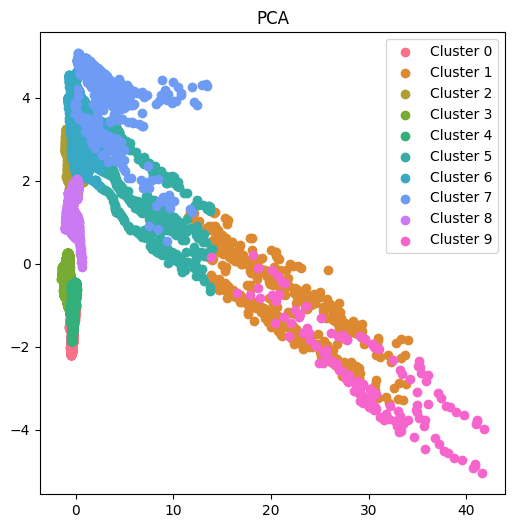

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'scaled_data' is defined before this code snippet
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

num_clusters = 10  # Replace with your desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(scaled_data)

reduced_df = pd.DataFrame({'PCA1': pca_result[:, 0], 'PCA2': pca_result[:, 1], 'Cluster': cluster_labels})

palette = sns.color_palette("husl", num_clusters)

plt.figure(figsize=(6, 6))

for cluster in range(num_clusters):
    plt.scatter(reduced_df[reduced_df['Cluster'] == cluster]['PCA1'], reduced_df[reduced_df['Cluster'] == cluster]['PCA2'], label=f'Cluster {cluster}', color=palette[cluster])

plt.title("PCA")
plt.legend()
# Save the plot
plt.savefig('PCA-plot.png')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


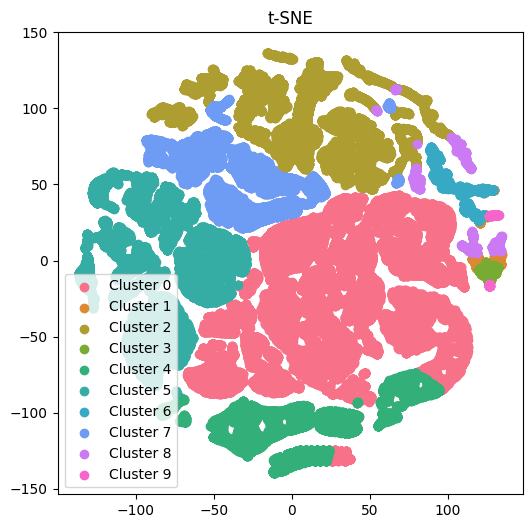

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'scaled_data' is defined before this code snippet
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(scaled_data)

num_clusters = 10  # Replace with your desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(scaled_data)

reduced_df = pd.DataFrame({'t-SNE1': tsne_result[:, 0], 't-SNE2': tsne_result[:, 1], 'Cluster': cluster_labels})

palette = sns.color_palette("husl", num_clusters)

plt.figure(figsize=(6, 6))

for cluster in range(num_clusters):
    plt.scatter(reduced_df[reduced_df['Cluster'] == cluster]['t-SNE1'], reduced_df[reduced_df['Cluster'] == cluster]['t-SNE2'], label=f'Cluster {cluster}', color=palette[cluster])

plt.title("t-SNE")
plt.legend()
# Save the plot
plt.savefig('t-SNE-plot.png')
plt.show()
